In [2]:
%matplotlib inline
import sys,os
try:
    import matk
except:
    try:
        sys.path.append(os.path.join('..','src'))
        import matk
    except ImportError as err:
        print 'Unable to load MATK module: '+str(err)
import numpy
from scipy import arange, randn, exp
from multiprocessing import freeze_support

# Model function
def dbexpl(p):
    t=arange(0,100,20.)
    y =  (p['par1']*exp(-p['par2']*t) + p['par3']*exp(-p['par4']*t))
    #nm =  ['o1','o2','o3','o4','o5']
    #return dict(zip(nm,y))
    return y

# Setup MATK model with parameters
p = matk.matk(model=dbexpl)
p.add_par('par1',min=0,max=1)
p.add_par('par2',min=0,max=0.2)
p.add_par('par3',min=0,max=1)
p.add_par('par4',min=0,max=0.2)


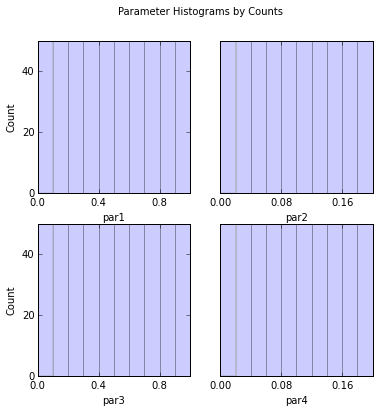



par1:
Count:           50       50       50       50       50       50       50       50       50       50 
 Bins:        0      0.1      0.2      0.3      0.4      0.5      0.6      0.7      0.8      0.9        1 

par2:
Count:           50       50       50       50       50       50       50       50       50       50 
 Bins:        0     0.02     0.04     0.06     0.08      0.1     0.12     0.14     0.16     0.18      0.2 

par3:
Count:           50       50       50       50       50       50       50       50       50       50 
 Bins:        0      0.1      0.2      0.3      0.4      0.5      0.6      0.7      0.8      0.9        1 

par4:
Count:           50       50       50       50       50       50       50       50       50       50 
 Bins:        0     0.02     0.04     0.06     0.08      0.1     0.12     0.14     0.16     0.18      0.2 



In [3]:
# Create LHS sample
s = p.lhs(siz=500, seed=1000)

# Look at sample parameter histograms, correlations, and panels
out = s.samples.hist(ncols=2,title='Parameter Histograms by Counts')

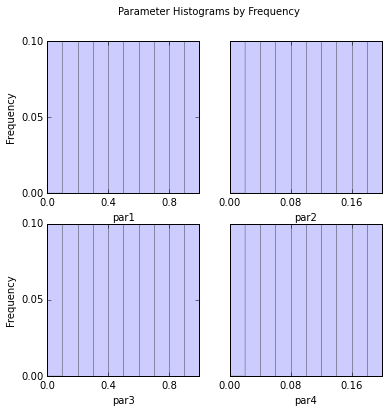

In [14]:
out = s.samples.hist(ncols=2,title='Parameter Histograms by Frequency',frequency=True,printout=False)

             par1     par2     par3     par4 
par1         1.00     0.00    -0.01    -0.01 
par2         0.00     1.00    -0.00     0.01 
par3        -0.01    -0.00     1.00     0.03 
par4        -0.01     0.01     0.03     1.00 


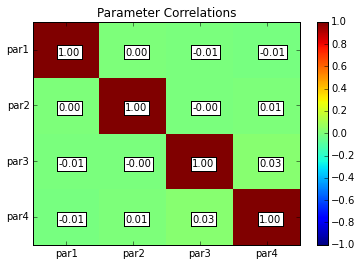

In [5]:
parcor = s.samples.corr(plot=True, title='Parameter Correlations')

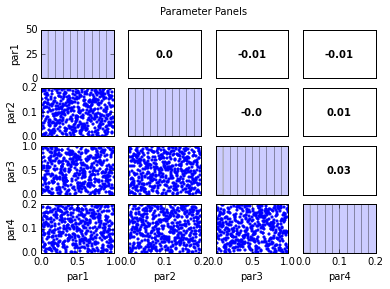

In [6]:
out = s.samples.panels(title='Parameter Panels')

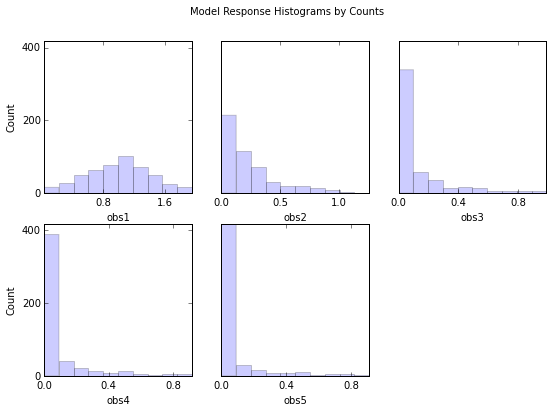

In [15]:
# Run model with parameter samples
s.run( cpus=2, outfile='results.dat', logfile='log.dat',verbose=False)

# Look at response histograms, correlations, and panels
out = s.responses.hist(ncols=3,title='Model Response Histograms by Counts', printout=False)

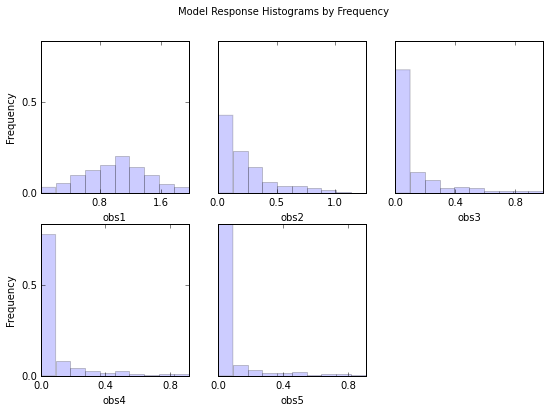

In [16]:
out = s.responses.hist(ncols=3,title='Model Response Histograms by Frequency',frequency=True,printout=False)

             obs1     obs2     obs3     obs4     obs5 
obs1         1.00     0.43     0.29     0.25     0.23 
obs2         0.43     1.00     0.95     0.89     0.83 
obs3         0.29     0.95     1.00     0.98     0.95 
obs4         0.25     0.89     0.98     1.00     0.99 
obs5         0.23     0.83     0.95     0.99     1.00 


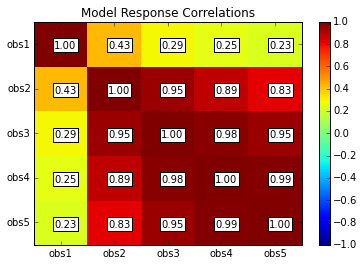

In [9]:
rescor = s.responses.corr(plot=True, title='Model Response Correlations')

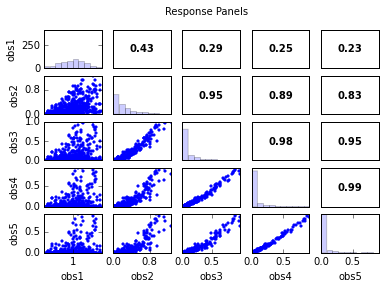

In [10]:
out = s.responses.panels(title='Response Panels')


Pearson Correlation Coefficients:
             obs1     obs2     obs3     obs4     obs5 
par1         0.70     0.30     0.18     0.14     0.12 
par2         0.00    -0.47    -0.40    -0.33    -0.29 
par3         0.70     0.31     0.23     0.22     0.21 
par4         0.01    -0.51    -0.46    -0.41    -0.37 


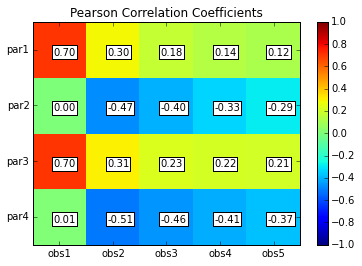

In [11]:
# Print and plot parameter/response correlations
print "\nPearson Correlation Coefficients:"
pcorr = s.corr(plot=True,title='Pearson Correlation Coefficients') 

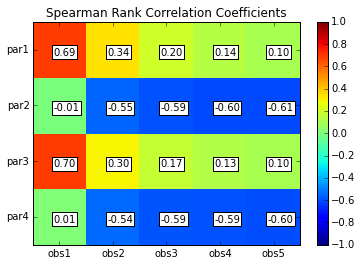

In [18]:
scorr = s.corr(plot=True,type='spearman',title='Spearman Rank Correlation Coefficients',printout=False) 

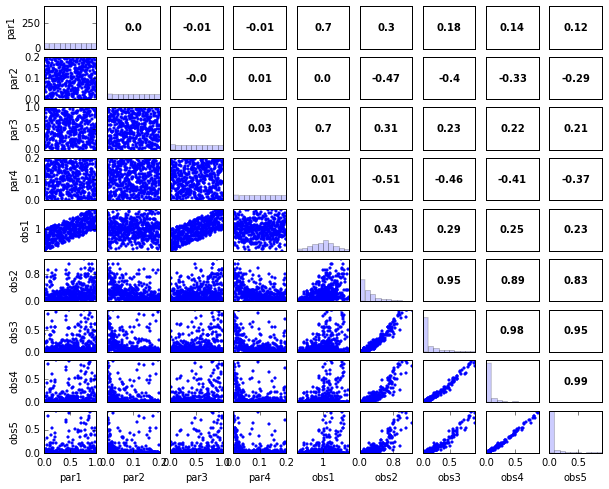

In [13]:
out = s.panels(figsize=(10,8))